# Importing the libraries

In [3]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np


# Reading the dataset 

In [4]:
df = pd.read_csv('breast-cancer-wisconsin.data')
df.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


# Label Encoding

In [5]:
df2 = df.apply(LabelEncoder().fit_transform)

# Slicing the dataset into input and output

In [6]:
x = df2.iloc[:, 0:10]
y = df2.iloc[:, 10]

# Splitting the dataset

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Standardization of Dataset

In [8]:
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)

# KNN Model

In [9]:
model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)#for euclidean distance we use p=2

In [10]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [11]:
y_pred = model.predict(x_test)

# Training and testing score

In [12]:
print(model.score(x_train, y_train))

0.9713261648745519


In [13]:
print(model.score(x_test, y_test))

0.9857142857142858


# plotting the confusion matrix

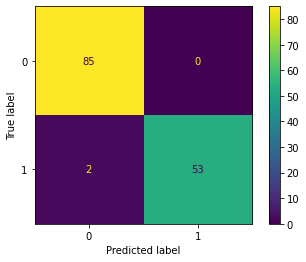

In [14]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

plt.show()